In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Puxar banco das vacinas
df_va = pd.read_csv('SESRS_VAC_APLICACAO_08_02_2022-08_54.csv', sep=';', encoding='cp1252')
print(f'Total vacinados: {df_va.shape}')

# Puxar banco erro imunizacoes
df_er = pd.read_csv('Relatorios/erro_imunizacao.csv', sep=';')
print(f'Total erros imunizações: {df_er.shape}')

# Puxar banco evento adverso
df_ev = pd.read_excel('Relatorios/evento_adverso.xlsx')
print(f'Total eventos adversos: {df_ev.shape}')

Total vacinados: (9083884, 15)
Total erros imunizações: (3415, 102)
Total eventos adversos: (34976, 106)


# ERRO IMUNIZAÇÕES

In [18]:

df_erro = df_er.copy()
#dataframe somente REACAO
df_erro = df_erro[['REACAO / EVENTO ADVERSO']]

# Criando a nova coluna 
df_erro['Nome Padrão'] = pd.Series(dtype='str')

#CADA ITEM RENOMEADO (PADRONIZAÇÃO)

#erros de imunização notificados sem caracterização do erro
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)', na=False), 'Nome Padrão'] = '*Não identificados'

#Erros de administração da vacina (Erro aplicação)
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Administração de vacina incorreta', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Erro de vacinação', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Administração incorreta', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Via incorreta de vacinação', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Extravasamento de medicamento', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Vacinação', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Vazamento da agulha', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Extravasamento no local de vacinação', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Extravasamento', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Extravasamento no local de aplicação', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Falha de vacinação', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Administração de vacina em local inadequado', na=False), 'Nome Padrão'] = 'Erro de administração da vacina'

#Administração em idade inadequada
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Administração de vacina para idade inadequada', na=False), 'Nome Padrão'] = 'Administração em idade inadequada'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Uso de medicamento em faixa etária não descrita em bula', na=False), 'Nome Padrão'] = 'Administração em idade inadequada'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Uso em faixa etária não aprovada conforme o documento de referência', na=False), 'Nome Padrão'] = 'Administração em idade inadequada'

# Posologia inadequada de administração
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Dose inadequada de vacina administrada', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Posologia inadequada de administração de vacina', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Dose errada administrada', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Dose inadequada de medicamento administrada', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Dose subterapêutica de vacina', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Ciclo de vacinação incompleto', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Formulação inadequada de vacina administrada', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Intervalo de administração de dose do medicamento muito curto', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Dose adicional administrada', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Problema de programação de data e horário do dispositivo', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Intervalo de administração de dose do medicamento muito longo', na=False), 'Nome Padrão'] = 'Posologia inadequada de administração'

# Problema na data de validade do produto
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Utilização de vacina vencida', na=False), 'Nome Padrão'] = 'Utilização de vacina vencida'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Problema na data de validade do produto', na=False), 'Nome Padrão'] = 'Utilização de vacina vencida'

# Intercambio de produtos de vacina
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Intercâmbio de produtos de vacina', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Problema relacionado ao componente de fabricação', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Incompatibilidade entre dispositivos', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Administração concomitante de medicamentos incompatíveis conhecidos', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Nenhuma reação a exposicao previa ao medicamento', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Nenhuma reação adversa', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Erro de prescrição do medicamento', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Exposição inadvertida a vacina', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Administração de vacina incorreta', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Produto medicamentoso incorreto selecionado', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Erro de medicação', na=False), 'Nome Padrão'] = 'Intercâmbio de produtos de vacina'

# Contraindicação a vacinação
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Contraindicação à vacinação', na=False), 'Nome Padrão'] = 'Contraindicação à vacinação'

# Gestantes, Puérperas e Lactantes
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Gravidez não planejada', na=False), 'Nome Padrão'] = 'Gestantes, Puérperas e Lactantes'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Gestante', na=False), 'Nome Padrão'] = 'Gestantes, Puérperas e Lactantes'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Exposição a vacina durante a gravidez', na=False), 'Nome Padrão'] = 'Gestantes, Puérperas e Lactantes'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Gestação', na=False), 'Nome Padrão'] = 'Gestantes, Puérperas e Lactantes'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Gestação normal', na=False), 'Nome Padrão'] = 'Gestantes, Puérperas e Lactantes'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Amamentação', na=False), 'Nome Padrão'] = 'Gestantes, Puérperas e Lactantes'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Exposição durante a amamentação', na=False), 'Nome Padrão'] = 'Gestantes, Puérperas e Lactantes'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Gravidez abdominal', na=False), 'Nome Padrão'] = 'Gestantes, Puérperas e Lactantes'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Distúrbios relacionados à gestação longa e peso elevado ao nascimento', na=False), 'Nome Padrão'] = 'Gestantes, Puérperas e Lactantes'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Gravidez normal', na=False), 'Nome Padrão'] = 'Gestantes, Puérperas e Lactantes'

# Imunização para covid-19 Positivo ****
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Imunização para COVID-19', na=False), 'Nome Padrão'] = 'Teste de COVID-19 positivo'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Teste do vírus de COVID-19 positivo', na=False), 'Nome Padrão'] = 'Teste de COVID-19 positivo'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)COVID-19', na=False), 'Nome Padrão'] = 'Teste de COVID-19 positivo'
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Imunização ativa', na=False), 'Nome Padrão'] = 'Teste de COVID-19 positivo'

# Atraso do produto devido à pandemia
df_erro.loc[df_erro['REACAO / EVENTO ADVERSO'].str.contains('(?i)Atraso do produto devido à pandemia', na=False), 'Nome Padrão'] = 'Atraso do produto devido à pandemia'

In [19]:
#teste pra ver se tem algum em branco
df_brancos = df_erro[df_erro['Nome Padrão'].isna() == True]
df_brancos.shape[0]

0

In [20]:
df_erro = df_erro[['Nome Padrão']]

# Criando uma nova coluna para fazer a contagem dos erros
df_erro['Total'] = 1

# Groupby = contagem somente de numeros 
df_erro = df_erro.groupby(['Nome Padrão']).sum()
df_erro.reset_index(inplace=True)

In [22]:
## CALCULAR TAXA DE INCIDENCIA PO 100 MIL
# usar banco vacinas
df_vacinados = df_va.copy()
# filtrar data até 08-02-2022 - CONFORME BOLETIM
df_vacinados = df_vacinados[df_vacinados['DATA']<= '2021-12-04']

# Total de vacinas aplicadas
total_aplicadas = df_vacinados['COUNT'].sum()
print(f'Total vacinados: {total_aplicadas}')

# Criando uma nova coluna para fazer a contagem dos erros
df_erro['Incidencia'] = 1

# calculando incidencia por 100 mil
for i in range(len(df_erro['Total'])):
    df_erro['Incidencia'][i] = "%.2f" % (df_erro['Total'][i]/total_aplicadas*100000)

# Ordenando os valores (maior para o menor)
df_erro = df_erro.sort_values('Incidencia', ascending=True)
df_erro

Total vacinados: 18233776


,Nome Padrão,Total,Incidencia
0,*Não identificados,40,0.22
7,Teste de COVID-19 positivo,52,0.29
2,Contraindicação à vacinação,63,0.35
3,Erro de administração da vacina,80,0.44
4,"Gestantes, Puérperas e Lactantes",80,0.44
1,Administração em idade inadequada,274,1.50
8,Utilização de vacina vencida,436,2.39
6,Posologia inadequada de administração,690,3.78
5,Intercâmbio de produtos de vacina,1700,9.32


In [6]:
# Não sei o porque, mas o gráfico não está começando no eixo 0,0
# O jeito que consegui corrigir foi da seguinte forma:
df_erro.to_excel('Erro imunizações.xlsx')
df_final = pd.read_excel('Erro imunizações.xlsx')

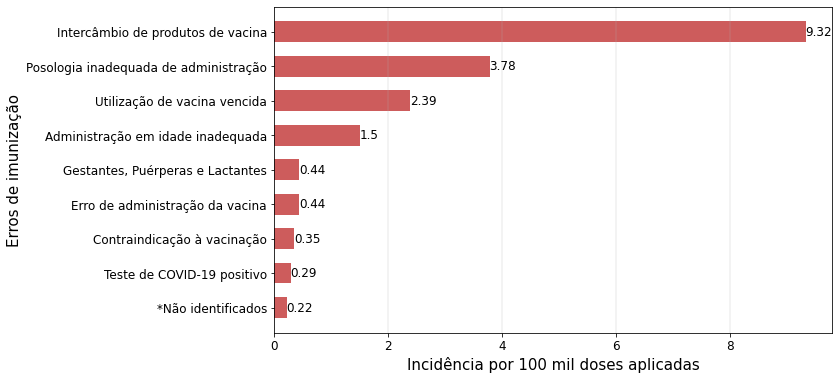

In [7]:
## GRÁFICO ##
plt.figure(figsize=(10, 6))
largura = 0.6

plt.barh(df_final['Nome Padrão'], df_final['Incidencia'], largura, color='indianred')
plt.xlabel('Incidência por 100 mil doses aplicadas',fontsize=15)
plt.ylabel('Erros de imunização',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linewidth=0.3)
plt.xlim(0.0)

#colocar valores na barra
for index, value in enumerate(df_final['Incidencia']): 
    plt.text(value, index, 
             str(value), va='center', fontsize=12) 

# Eixo x não está iniciando no zero
    
plt.savefig('Graficos/Figura 10.png', dpi=(800), bbox_inches='tight')
plt.show()

# CLASSIFICAÇÃO DE CAUSALIDADE 

In [35]:
## Classificacao de causalidades graves
df_eventos = df_ev.copy()
# Filtrar apenas graves
df_eventos = df_eventos[df_eventos['CLASSIFICACAO DE GRAVIDADE'] == 'Grave']

# Filtrar apenas os campos que não estão nulos
df_eventos = df_eventos[(df_eventos['ENCERRAMENTO MUNICIPAL - CAUSALIDADE'].notna()) | 
                        (df_eventos['ENCERRAMENTO ESTADUAL - CAUSALIDADE'].notna()) | 
                        (df_eventos['ENCERRAMENTO FEDERAL - CAUSALIDADE'].notna()) | 
                        (df_eventos['ENCERRAMENTO CIFAVI - CAUSALIDADE'].notna())]

# Filtrando colunas
df_eventos = df_eventos[['NUMERO DA NOTIFICACAO', 'ENCERRAMENTO MUNICIPAL - CAUSALIDADE', 
'ENCERRAMENTO ESTADUAL - CAUSALIDADE','ENCERRAMENTO FEDERAL - CAUSALIDADE']]

# Tirar duplicadas
df_eventos.drop_duplicates(subset=['NUMERO DA NOTIFICACAO'], inplace=True)
df_eventos

,NUMERO DA NOTIFICACAO,ENCERRAMENTO MUNICIPAL - CAUSALIDADE,ENCERRAMENTO ESTADUAL - CAUSALIDADE,ENCERRAMENTO FEDERAL - CAUSALIDADE
221,1432100165458,NaN,1: B2 – Os dados da investigação são conflitan...,NaN
236,1432100165734,NaN,1: C - Inconsistente ou coincidente,NaN
744,1432100168712,NaN,NaN,1: C - Inconsistente ou coincidente
1674,1432100173999,NaN,"1: A.1- Reações inerentes ao produto, conforme...",NaN
1762,1432100174384,NaN,1: A4 - Reação de ansiedade associada à vacina...,NaN
...,...,...,...,...
31420,1432100034894,1: C - Inconsistente ou coincidente,NaN,NaN
31609,1432100036233,1: C - Inconsistente ou coincidente,NaN,NaN
31864,1432100037311,"1: B1 – Relação temporal consistente, mas sem ...",NaN,NaN
32540,1432100001480,NaN,1: C - Inconsistente ou coincidente,NaN


In [36]:
# Fazendo um MELT para juntar colunas
df_eventos = df_eventos.melt(id_vars=['NUMERO DA NOTIFICACAO'], value_vars= ['ENCERRAMENTO MUNICIPAL - CAUSALIDADE',
'ENCERRAMENTO ESTADUAL - CAUSALIDADE','ENCERRAMENTO FEDERAL - CAUSALIDADE'], var_name='encerramento', value_name='causalidade')

In [38]:
# Manter apenas os valores que não são nulos
df_eventos = df_eventos[df_eventos['causalidade'].notna()]

In [39]:
# Apagando coluna ENCERRAMENTO pois nao é de interesse
df_eventos.drop(['encerramento'], axis=1, inplace=True)

In [40]:
# Apagando duplicados em todo DF
df_eventos.drop_duplicates(inplace=True)

In [43]:
# Drop pela coluna pq ainda ficou um duplicado
# df_eventos[df_eventos.duplicated(['NUMERO DA NOTIFICACAO'], keep=False)]
df_eventos.drop_duplicates(['NUMERO DA NOTIFICACAO'], keep='last', inplace=True)

In [44]:
# teste pra ver se ainda temos alguma duplicada
df_eventos[df_eventos.duplicated(['NUMERO DA NOTIFICACAO'], keep=False)]

,NUMERO DA NOTIFICACAO,causalidade


In [49]:
df_eventos['count'] = 1
# Padronizando nomes
df_eventos.loc[df_eventos.causalidade.str.contains('C - Inconsistente ou coincidente'), 'causalidade'] = 'C - Inconsistente ou coincidente'
df_eventos.loc[df_eventos.causalidade.str.contains('B2 – Os dados da investigação são conflitantes em relação à causalidade'), 'causalidade'] = 'B2 – Os dados da investigação são conflitantes em relação à causalidade'
df_eventos.loc[df_eventos.causalidade.str.contains('B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal'), 'causalidade'] = 'B1 – Relação temporal consistente, mas sem evidências na literatura para estabelecer uma relação causal'
df_eventos.loc[df_eventos.causalidade.str.contains('A.1- Reações inerentes ao produto, conforme literatura'), 'causalidade'] = 'A.1- Reações inerentes ao produto, conforme literatura'
df_eventos.loc[df_eventos.causalidade.str.contains('D - Inclassificável'), 'causalidade'] = 'D - Inclassificável'

# Usando crosstab
table = pd.crosstab(df_eventos['causalidade'], df_eventos['count']).reset_index()
table.rename(columns={1: 'n'}, inplace=True)
table

count,causalidade,n
0,"A.1- Reações inerentes ao produto, conforme li...",18
1,"B1 – Relação temporal consistente, mas sem evi...",20
2,B2 – Os dados da investigação são conflitantes...,15
3,C - Inconsistente ou coincidente,33
4,D - Inclassificável,3


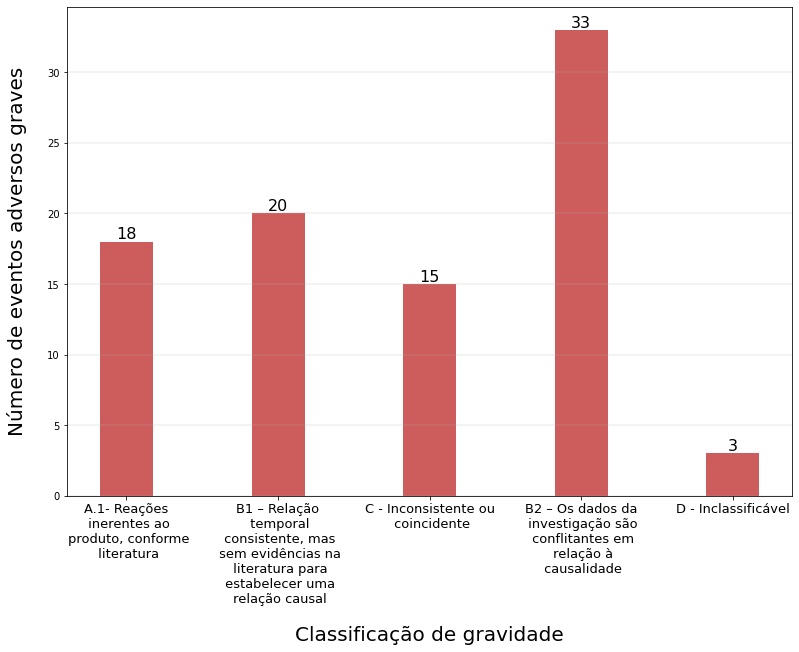

In [50]:
## GRÁFICO

plt.figure(figsize=(13,9))
width = 0.35

plt.bar(table['causalidade'], table['n'], width, color='indianred')

# colocando \n na legenda do eixo x
plt.xticks(table['causalidade'], ('A.1- Reações\n inerentes ao\n produto, conforme\n literatura', 
               'B1 – Relação\n temporal\n consistente, mas\n sem evidências na\n literatura para\n estabelecer uma\n relação causal',
               'C - Inconsistente ou\n coincidente',
               'B2 – Os dados da\n investigação são\n conflitantes em\n relação à\n causalidade',
               'D - Inclassificável'), fontsize=13)

plt.xlabel('Classificação de gravidade',labelpad=20,fontsize=20)
plt.ylabel('Número de eventos adversos graves',labelpad=20,fontsize=20)
plt.grid(axis='y', linewidth=0.3)

for i in range(len(table['causalidade'])):
        plt.text(i, table['n'][i] + 0.2, table['n'][i], ha = 'center', fontsize=16)

plt.savefig("Graficos/Figura 6.png",dpi=800, bbox_inches='tight')
plt.show()